# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [1]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-29 23:56:33--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-29 23:56:33--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmentos 

In [2]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [3]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


In [4]:
numero_clientes = df['id_cliente'].nunique()
numero_clientes

15000

In [5]:
distribucion_plataforma = df.groupby('plataforma')['id_cliente'].nunique().reset_index()
distribucion_plataforma.columns = ['Plataforma', 'Número de Clientes']
distribucion_plataforma

,Plataforma,Número de Clientes
0,Facebook,5288
1,Instagram,5972
2,TikTok,3740


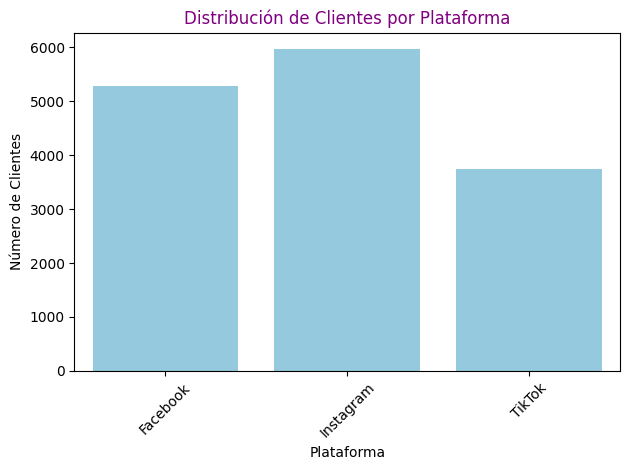

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=distribucion_plataforma, x='Plataforma', y='Número de Clientes', color='skyblue')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Plataforma', color='purple')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


In [7]:
df['edad'].describe()

,edad
count,15000.000000
mean,33.101800
std,11.393441
min,16.000000
25%,24.000000
50%,31.000000
75%,40.000000
max,60.000000


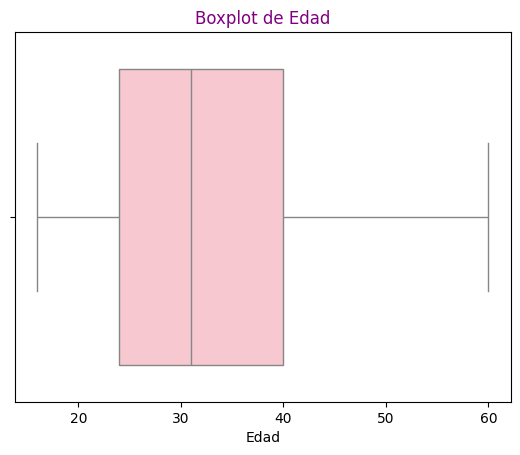

In [8]:
sns.boxplot(x=df['edad'],color='pink') # Gráfico para visualizar los outliers
plt.title('Boxplot de Edad', color='purple')
plt.xlabel('Edad')
plt.show()

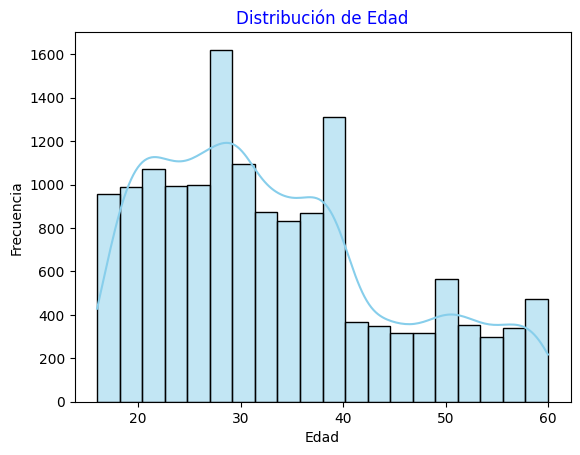

In [9]:
sns.histplot(df['edad'], bins=20, kde=True, color='skyblue') #Visualización de la distribución de la edad
plt.title('Distribución de Edad', color='blue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### P3. ¿Existe correlación entre ingresos y total_gastado?


In [10]:
correlacion = df['ingresos'].corr(df['total_gastado'])
print(f"Correlación entre income y total_gastado: {correlacion:.2f}")

Correlación entre income y total_gastado: 0.26


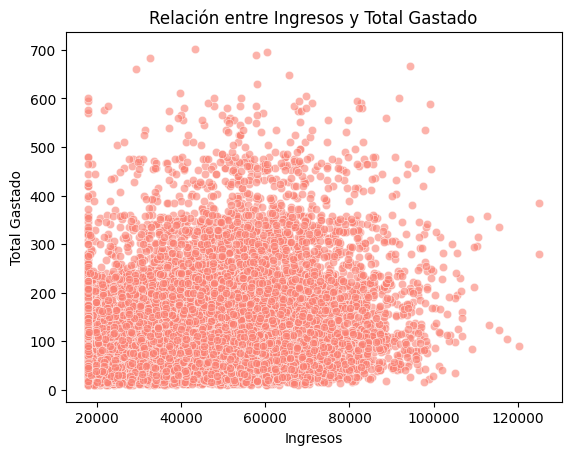

In [11]:
sns.scatterplot(data=df, x='ingresos', y='total_gastado', alpha=0.6, color='salmon') #correlación entre ingresos y total gastado
plt.title('Relación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [12]:
from datetime import datetime

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)

### P4. CAC vs LTV por plataforma

In [13]:
cac_por_plataforma = df.groupby('plataforma')['costo_adquisicion'].mean() #CAC por plataforma
cac_por_plataforma.columns = ['plataforma', 'CAC']
cac_por_plataforma

,costo_adquisicion
plataforma,
Facebook,25.039334
Instagram,17.488948
TikTok,12.598128


In [14]:
ltv_por_plataforma = df.groupby('plataforma')['total_gastado'].mean().reset_index() #LTV por plataforma
ltv_por_plataforma.columns = ['plataforma', 'LTV']
ltv_por_plataforma

,plataforma,LTV
0,Facebook,186.871407
1,Instagram,87.800904
2,TikTok,57.341979


In [15]:
df['ltv'] = df['total_gastado']  # Si LTV es total_gastado por cliente

CAC_LTV = df.groupby('plataforma')[['costo_adquisicion', 'ltv']].mean()
CAC_LTV

,costo_adquisicion,ltv
plataforma,,
Facebook,25.039334,186.871407
Instagram,17.488948,87.800904
TikTok,12.598128,57.341979


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

### P5. Visualiza clusters

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

### P6. Ganancia promedio por cluster

### P7. Género por cluster


### P8. Plataforma por cluster


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología